# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.compose import ColumnTransformer

# Import dataset

In [2]:
df = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FireplaceQu  770 non-null    object
 1   GarageQual   1379 non-null   object
 2   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


In [4]:
df.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


#use mode on GarageQual

## Split train test split

In [6]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
impute1 = SimpleImputer(strategy='most_frequent')

In [9]:
impute1.fit(X_train)

SimpleImputer(strategy='most_frequent')

In [10]:
impute1.statistics_

array(['Gd', 'TA'], dtype=object)

In [14]:
df_trf = impute1.transform(X_train)

In [15]:
df_trf.shape

(1168, 2)

## Build a new DataFrame

In [16]:
new_df = pd.DataFrame(df_trf,columns=X_train.columns)

In [17]:
new_df.head()

,FireplaceQu,GarageQual
0,Gd,TA
1,Gd,TA
2,Gd,TA
3,Gd,TA
4,TA,TA


## See distribution

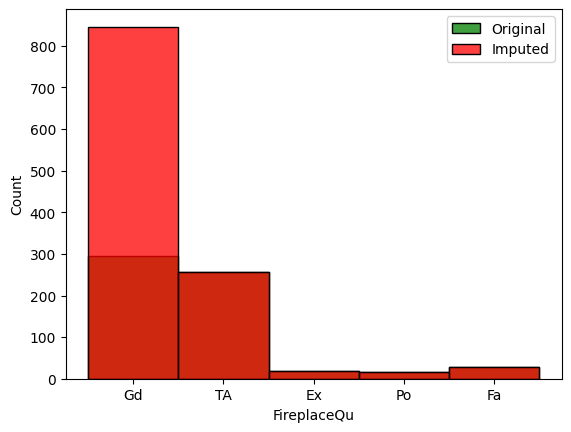

In [23]:
sns.histplot(X_train['FireplaceQu'], color='green', label='Original')
sns.histplot(new_df['FireplaceQu'], color='red', label='Imputed')
plt.legend()
plt.show()

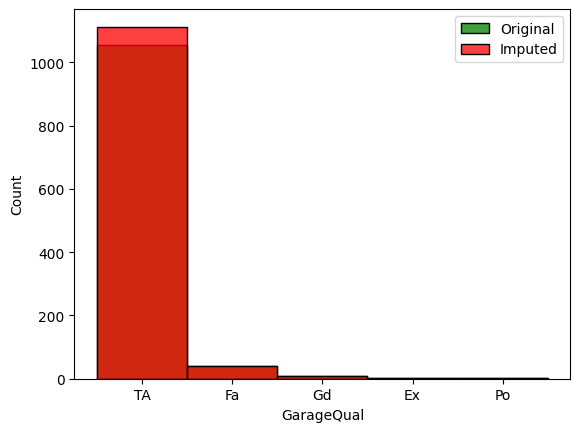

In [22]:
sns.histplot(X_train['GarageQual'], color='green', label='Original')
sns.histplot(new_df['GarageQual'], color='red', label='Imputed')
plt.legend()
plt.show()